In [2]:
pwd

u'/Users/shafeeqrahaman/Documents/Python/Kaggle Olympic Games'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os
print(os.listdir("../Kaggle Olympic Games"))

['noc_regions.csv', 'Olympic Games.ipynb', 'athlete_events.csv', '.ipynb_checkpoints']


In [4]:
data = pd.read_csv('../Kaggle Olympic Games/athlete_events.csv')
regions = pd.read_csv('../Kaggle Olympic Games/noc_regions.csv')

In [5]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,PHI,Germany,Refugee Olympic Team
freq,1,4,1


In [10]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [11]:
merged_data = pd.merge(data, regions, on='NOC', how='left')

In [12]:
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
# Three types of medals
merged_data.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [14]:
#Creating a dataset that has only Gold Medals in order to analyze the distribution of it.
gold_data = merged_data[(merged_data.Medal=='Gold')]

In [15]:
gold_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [16]:
#There are 13372 gold medalists
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13372 entries, 3 to 271076
Data columns (total 17 columns):
ID        13372 non-null int64
Name      13372 non-null object
Sex       13372 non-null object
Age       13224 non-null float64
Height    10539 non-null float64
Weight    10254 non-null float64
Team      13372 non-null object
NOC       13372 non-null object
Games     13372 non-null object
Year      13372 non-null int64
Season    13372 non-null object
City      13372 non-null object
Sport     13372 non-null object
Event     13372 non-null object
Medal     13372 non-null object
region    13371 non-null object
notes     171 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


In [17]:
#If we plot the age of gold medals we could see the distribution but for that first we have to see the unique values
gold_data.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [18]:
#As there are missing values in the Age column, we need to get rid of those in order to plot a proper distribution
gold_data_clean = gold_data[np.isfinite(gold_data['Age'])]

In [19]:
#All rows with NaN in Age column have been removed
gold_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
ID        13224 non-null int64
Name      13224 non-null object
Sex       13224 non-null object
Age       13224 non-null float64
Height    10532 non-null float64
Weight    10248 non-null float64
Team      13224 non-null object
NOC       13224 non-null object
Games     13224 non-null object
Year      13224 non-null int64
Season    13224 non-null object
City      13224 non-null object
Sport     13224 non-null object
Event     13224 non-null object
Medal     13224 non-null object
region    13223 non-null object
notes     171 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


Text(0.5,1,'Distribution of Age')

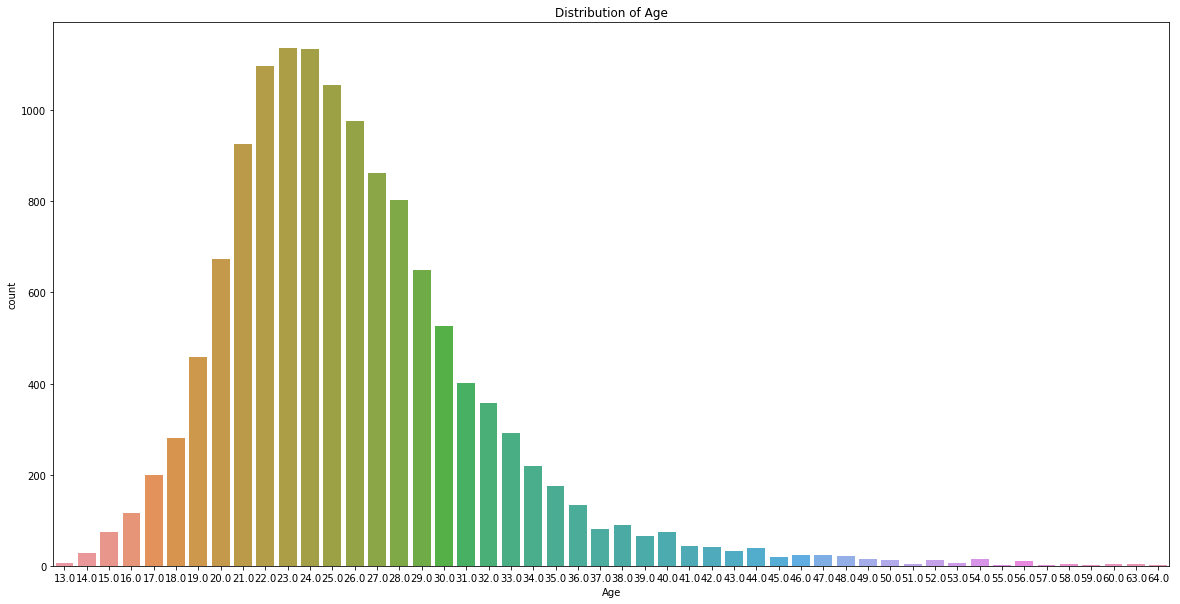

In [20]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(gold_data_clean['Age'])
plt.title('Distribution of Age')

In [21]:
#We see that most of the atheletes are in the 20's but we do see people above Age 50 who have won Gold.
gold_data_clean['ID'][gold_data_clean['Age']>50].count()

65

In [22]:
#The count of people who have won Gold above the age of 50 are 65
#Lets find to which department/disciplines these 65 people belong so as to understand how did they win a Gold at age>50
gold_old = gold_data_clean['Sport'][gold_data_clean['Age']>50]
#masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

In [23]:
#There are 9 sports in which the senior citizens have participated and won Gold, to know more about them lets plot
gold_old.describe()

count                65
unique                9
top       Equestrianism
freq                 18
Name: Sport, dtype: object

In [24]:
#The following are the sports they have played
gold_old.unique()

array(['Equestrianism', 'Sailing', 'Alpinism', 'Art Competitions',
       'Curling', 'Roque', 'Shooting', 'Archery', 'Croquet'], dtype=object)

Text(0.5,1,'Gold Medals for Athletes for Age > 50')

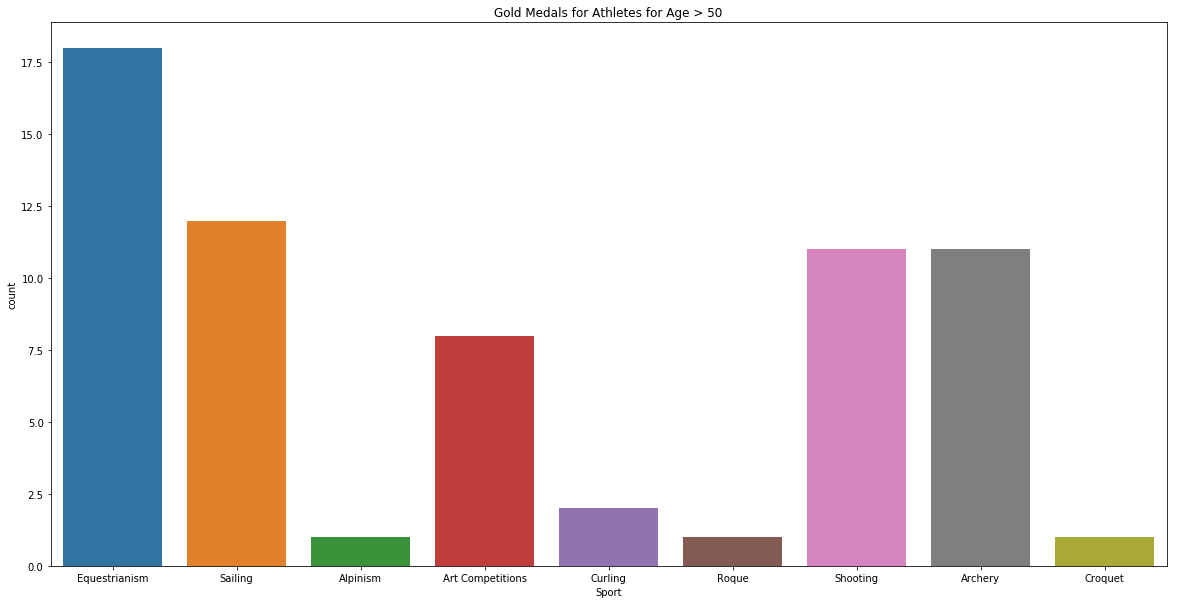

In [25]:
#Shooting, Archery, Sailing etc are the sports that the seniors have played.
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.countplot(gold_old)
plt.title('Gold Medals for Athletes for Age > 50')

In [26]:
#Similarly lets try to perform the same analysis from Bronze Medals.
bronze_data = merged_data[merged_data.Medal=='Bronze']
bronze_data.describe()

,ID,Age,Height,Weight,Year
count,13295.000000,13006.000000,10366.000000,10227.000000,13295.000000
mean,69611.702971,25.879210,177.298283,73.479010,1975.189169
std,38714.071526,5.831923,10.794729,15.017676,33.165118
min,15.000000,10.000000,136.000000,28.000000,1896.000000
25%,36829.000000,22.000000,170.000000,63.000000,1956.000000
50%,69093.000000,25.000000,178.000000,72.000000,1984.000000
75%,103558.000000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,72.000000,223.000000,182.000000,2016.000000


In [27]:
bronze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13295 entries, 37 to 271102
Data columns (total 17 columns):
ID        13295 non-null int64
Name      13295 non-null object
Sex       13295 non-null object
Age       13006 non-null float64
Height    10366 non-null float64
Weight    10227 non-null float64
Team      13295 non-null object
NOC       13295 non-null object
Games     13295 non-null object
Year      13295 non-null int64
Season    13295 non-null object
City      13295 non-null object
Sport     13295 non-null object
Event     13295 non-null object
Medal     13295 non-null object
region    13291 non-null object
notes     162 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


In [28]:
bronze_data.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [29]:
bronze_data_clean = bronze_data[np.isfinite(bronze_data['Age'])]
bronze_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13006 entries, 37 to 271102
Data columns (total 17 columns):
ID        13006 non-null int64
Name      13006 non-null object
Sex       13006 non-null object
Age       13006 non-null float64
Height    10359 non-null float64
Weight    10219 non-null float64
Team      13006 non-null object
NOC       13006 non-null object
Games     13006 non-null object
Year      13006 non-null int64
Season    13006 non-null object
City      13006 non-null object
Sport     13006 non-null object
Event     13006 non-null object
Medal     13006 non-null object
region    13002 non-null object
notes     158 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


In [30]:
bronze_data_clean.describe()

,ID,Age,Height,Weight,Year
count,13006.000000,13006.000000,10359.000000,10219.000000,13006.000000
mean,69595.789097,25.879210,177.300608,73.484963,1976.574197
std,38724.709394,5.831923,10.795470,15.020858,32.121492
min,15.000000,10.000000,136.000000,28.000000,1896.000000
25%,36865.500000,22.000000,170.000000,63.000000,1956.000000
50%,68925.500000,25.000000,178.000000,72.000000,1984.000000
75%,103584.500000,29.000000,184.000000,82.000000,2004.000000
max,135563.000000,72.000000,223.000000,182.000000,2016.000000


Text(0.5,1,'Distribution of Age for Bronze Winners')

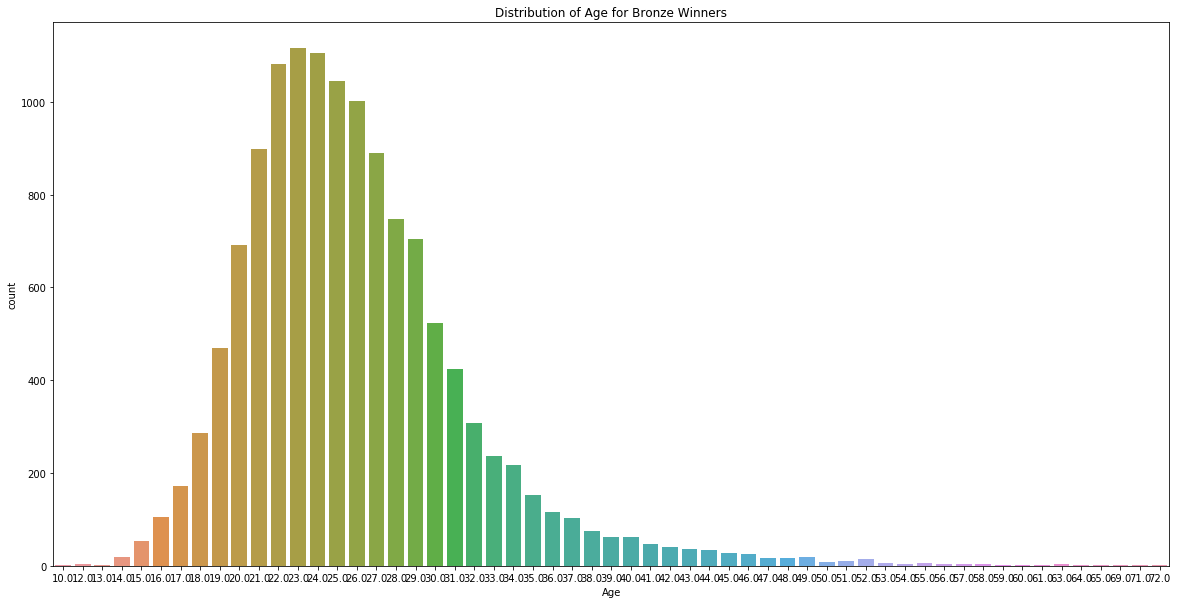

In [31]:
#Distribution of age
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(bronze_data_clean['Age'])
plt.title('Distribution of Age for Bronze Winners')

In [32]:
bronze_data_clean['ID'][bronze_data_clean['Age']>50].count()
#64 people of senior category won Broze

64

In [33]:
bronze_old = bronze_data_clean['Sport'][bronze_data_clean['Age']>50]
bronze_old.describe()

count           64
unique           6
top       Shooting
freq            18
Name: Sport, dtype: object

Text(0.5,1,'Sports played by senior citizens who won Bronze')

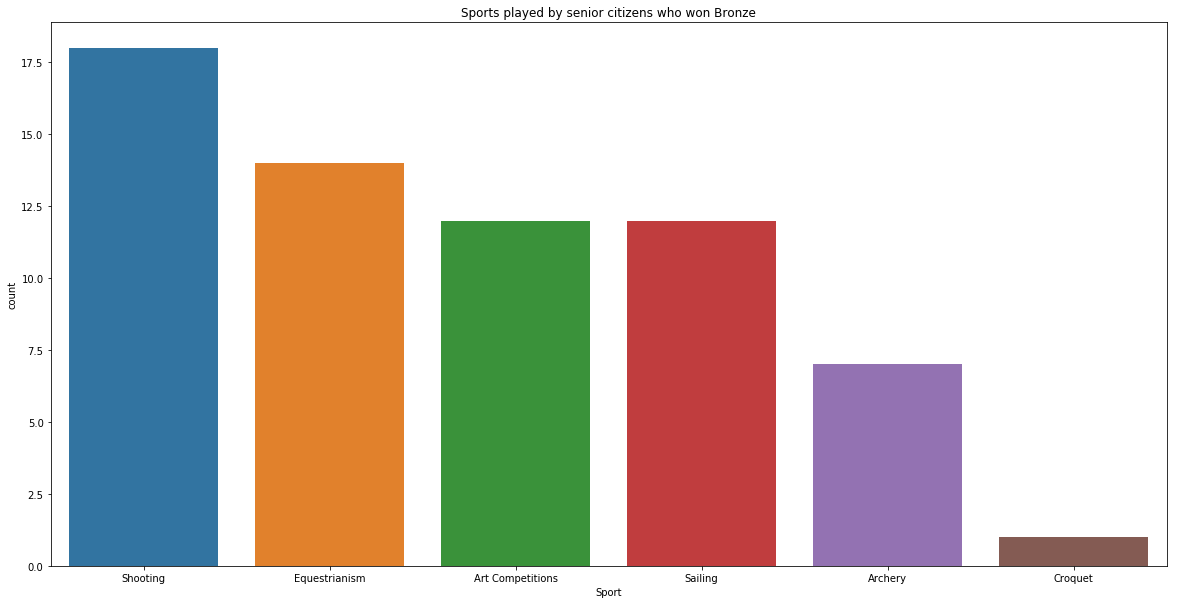

In [34]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(bronze_old)
plt.title('Sports played by senior citizens who won Bronze')

In [35]:
#Similarly lets try to perform the same analysis from Silver Medals.
silver_data = merged_data[merged_data.Medal=='Silver']
silver_data.describe()

,ID,Age,Height,Weight,Year
count,13116.000000,12821.000000,10167.000000,9975.000000,13116.000000
mean,69249.335011,25.996724,177.458247,73.644962,1973.509607
std,38806.260769,6.017395,10.820082,14.807099,34.083531
min,20.000000,11.000000,136.000000,30.000000,1896.000000
25%,36647.750000,22.000000,170.000000,63.000000,1952.000000
50%,68790.500000,25.000000,178.000000,73.000000,1984.000000
75%,103085.250000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,167.000000,2016.000000


In [36]:
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13116 entries, 63 to 271103
Data columns (total 17 columns):
ID        13116 non-null int64
Name      13116 non-null object
Sex       13116 non-null object
Age       12821 non-null float64
Height    10167 non-null float64
Weight    9975 non-null float64
Team      13116 non-null object
NOC       13116 non-null object
Games     13116 non-null object
Year      13116 non-null int64
Season    13116 non-null object
City      13116 non-null object
Sport     13116 non-null object
Event     13116 non-null object
Medal     13116 non-null object
region    13112 non-null object
notes     212 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


In [37]:
silver_data.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [38]:
silver_data_clean = silver_data[np.isfinite(silver_data['Age'])]
silver_data_clean.describe()

,ID,Age,Height,Weight,Year
count,12821.000000,12821.000000,10158.000000,9958.000000,12821.000000
mean,69229.651743,25.996724,177.462788,73.653093,1974.961391
std,38781.104486,6.017395,10.821488,14.802273,33.026017
min,20.000000,11.000000,136.000000,30.000000,1896.000000
25%,36764.000000,22.000000,170.000000,63.000000,1956.000000
50%,68804.000000,25.000000,178.000000,73.000000,1984.000000
75%,103012.000000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,167.000000,2016.000000


In [39]:
silver_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12821 entries, 63 to 271103
Data columns (total 17 columns):
ID        12821 non-null int64
Name      12821 non-null object
Sex       12821 non-null object
Age       12821 non-null float64
Height    10158 non-null float64
Weight    9958 non-null float64
Team      12821 non-null object
NOC       12821 non-null object
Games     12821 non-null object
Year      12821 non-null int64
Season    12821 non-null object
City      12821 non-null object
Sport     12821 non-null object
Event     12821 non-null object
Medal     12821 non-null object
region    12817 non-null object
notes     212 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


Text(0.5,1,'Distribution of Age for Silver Winners')

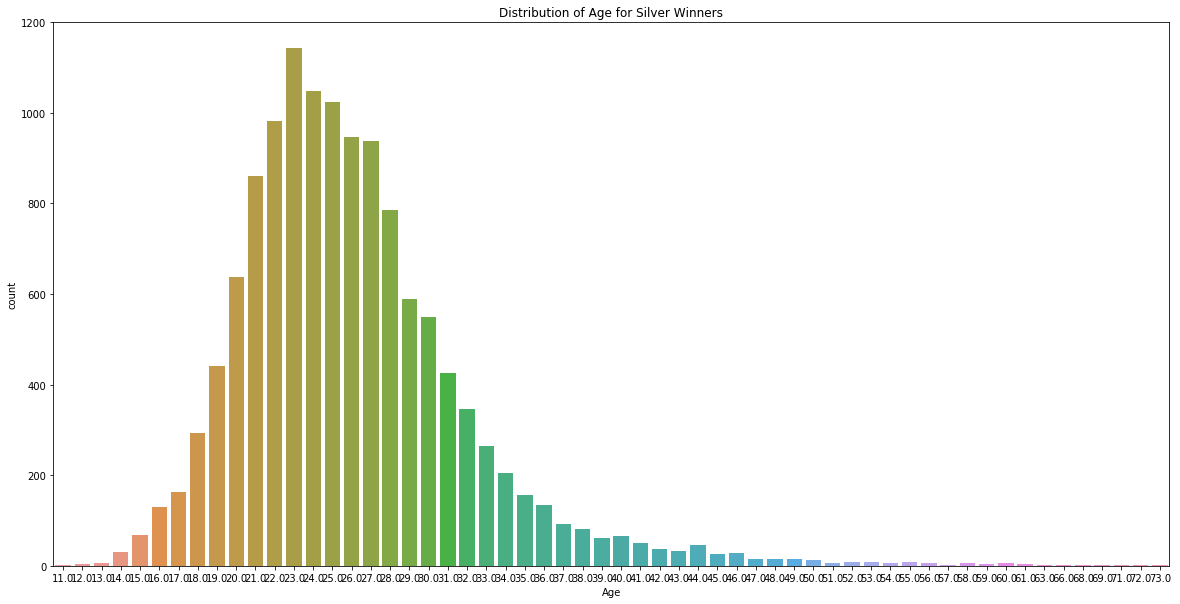

In [40]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(silver_data_clean['Age'])
plt.title('Distribution of Age for Silver Winners')

In [41]:
silver_data_clean['ID'][silver_data_clean['Age']>50].count()

74

In [42]:
silver_old = silver_data_clean['Sport'][silver_data_clean['Age']>50]
silver_old.describe()

count          74
unique          9
top       Archery
freq           15
Name: Sport, dtype: object

Text(0.5,1,'Sports played by Senior Citizens who won Silver')

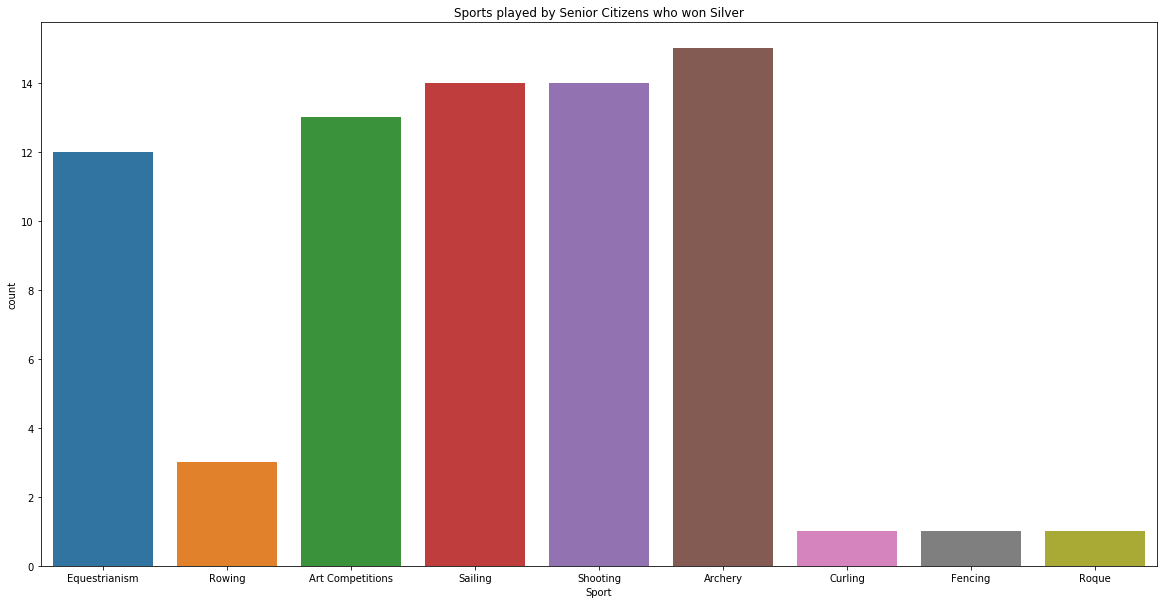

In [43]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(silver_old)
plt.title('Sports played by Senior Citizens who won Silver')

In [44]:
#Female Specific Data
female_data = merged_data[merged_data.Sex=='F']
female_data.describe()

,ID,Age,Height,Weight,Year
count,74522.000000,74098.000000,67378.000000,66771.000000,74522.000000
mean,69956.722887,23.732881,167.839740,60.021252,1992.445748
std,38932.561177,5.795252,8.778528,10.212250,20.458993
min,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,36558.500000,20.000000,162.000000,54.000000,1984.000000
50%,70128.000000,23.000000,168.000000,59.000000,1998.000000
75%,103534.750000,27.000000,173.000000,65.000000,2008.000000
max,135568.000000,74.000000,213.000000,167.000000,2016.000000


In [45]:
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 17 columns):
ID        74522 non-null int64
Name      74522 non-null object
Sex       74522 non-null object
Age       74098 non-null float64
Height    67378 non-null float64
Weight    66771 non-null float64
Team      74522 non-null object
NOC       74522 non-null object
Games     74522 non-null object
Year      74522 non-null int64
Season    74522 non-null object
City      74522 non-null object
Sport     74522 non-null object
Event     74522 non-null object
Medal     11253 non-null object
region    74386 non-null object
notes     901 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 10.2+ MB


In [46]:
#Filtering Female data according to Season
female_winter = female_data[female_data['Season']=='Winter']
female_summer = female_data[female_data['Season']=='Summer']

In [47]:
female_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


In [48]:
female_winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Text(0.5,1,'Medals Won by athletes across the years during Summer')

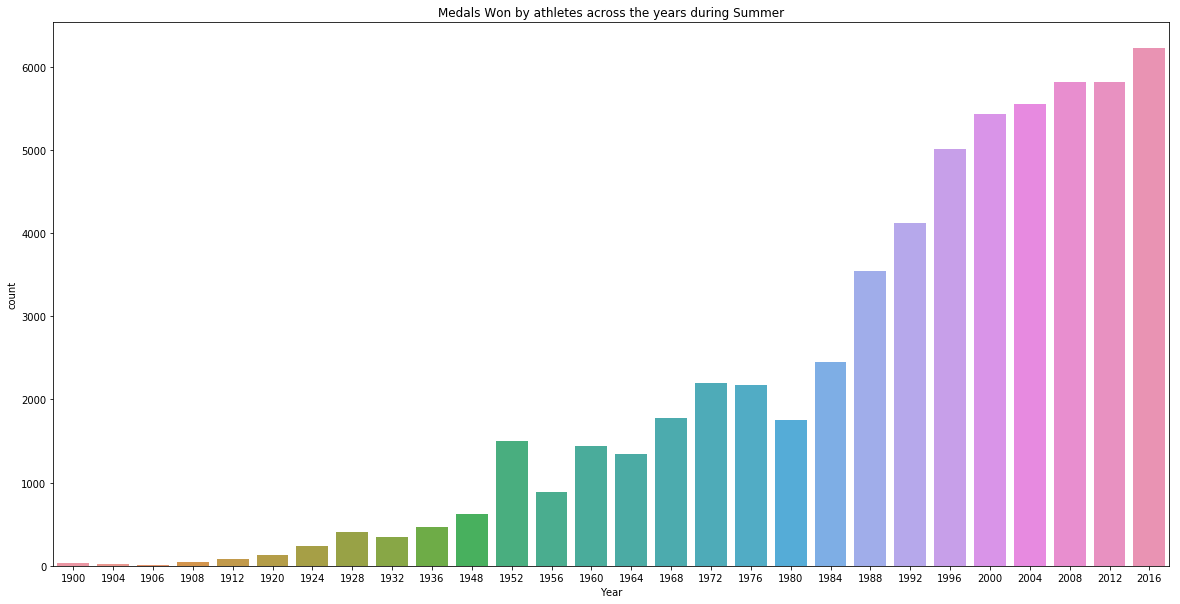

In [49]:
#Ploting the Medals won by Female athletes during the Summer across the years
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x='Year', data=female_summer)
plt.title('Medals Won by athletes across the years during Summer')

In [50]:
#Athletes who won during 1900 sports
female_summer.loc[female_summer['Year']==1900]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


In [51]:
#To cross check the results above, lets take the year 1900
female_summer['ID'].loc[female_summer['Year']==1900].count()

#So, the value matches with the graph we have 33 medals that were given out (one athlete could have won more than one medal)

33

Text(0.5,1,'Medals Won by athletes across the years during Winter')

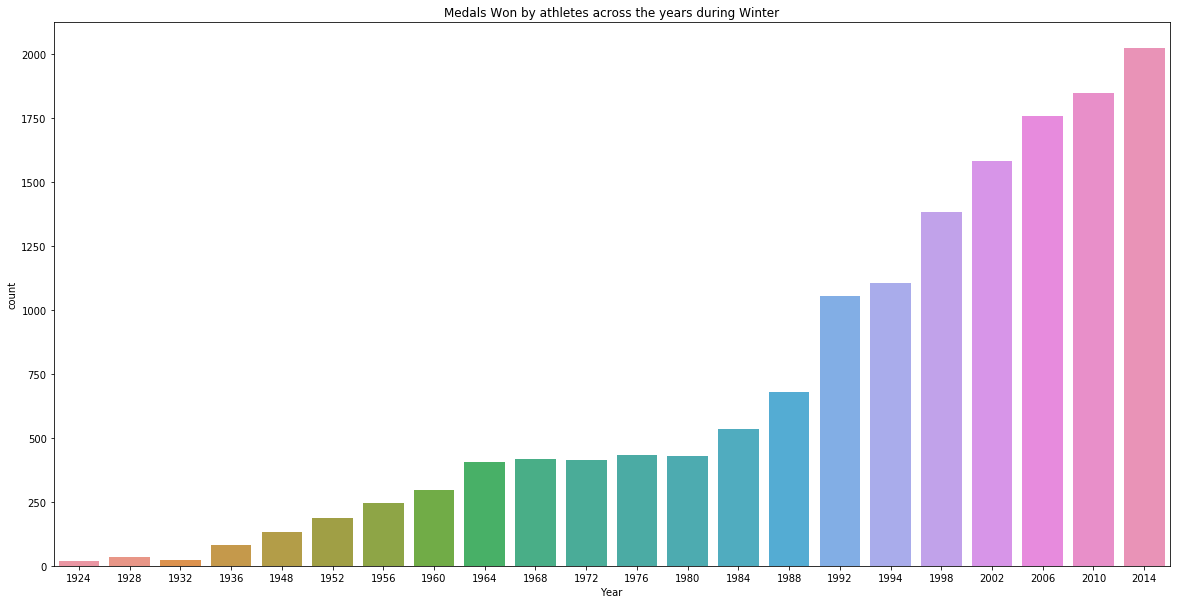

In [52]:
#Ploting the Medals won by Female athletes during the Winter across the years
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x='Year', data=female_winter)
plt.title('Medals Won by athletes across the years during Winter')

In [53]:
#In order to see the relationship between Weight and Height of Female athletes missing values need to be removed
#Rows before removing nulls
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 17 columns):
ID        74522 non-null int64
Name      74522 non-null object
Sex       74522 non-null object
Age       74098 non-null float64
Height    67378 non-null float64
Weight    66771 non-null float64
Team      74522 non-null object
NOC       74522 non-null object
Games     74522 non-null object
Year      74522 non-null int64
Season    74522 non-null object
City      74522 non-null object
Sport     74522 non-null object
Event     74522 non-null object
Medal     11253 non-null object
region    74386 non-null object
notes     901 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 10.2+ MB


In [54]:
#Plot a scatter plot between Height and Weight of female athletes
#by removing the missing value rows from the height and weight column of the data frame
female_data_notnulls = female_data[(female_data['Height'].notnull()) & (female_data['Weight'].notnull())]
female_data_notnulls.info()
# info function shows that all the missing values have been remove from height and weight column.
#Note: missing values may still be there in the other columns but only have been removed from the height and weight columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66729 entries, 4 to 271110
Data columns (total 17 columns):
ID        66729 non-null int64
Name      66729 non-null object
Sex       66729 non-null object
Age       66711 non-null float64
Height    66729 non-null float64
Weight    66729 non-null float64
Team      66729 non-null object
NOC       66729 non-null object
Games     66729 non-null object
Year      66729 non-null int64
Season    66729 non-null object
City      66729 non-null object
Sport     66729 non-null object
Event     66729 non-null object
Medal     10350 non-null object
region    66610 non-null object
notes     724 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 9.2+ MB


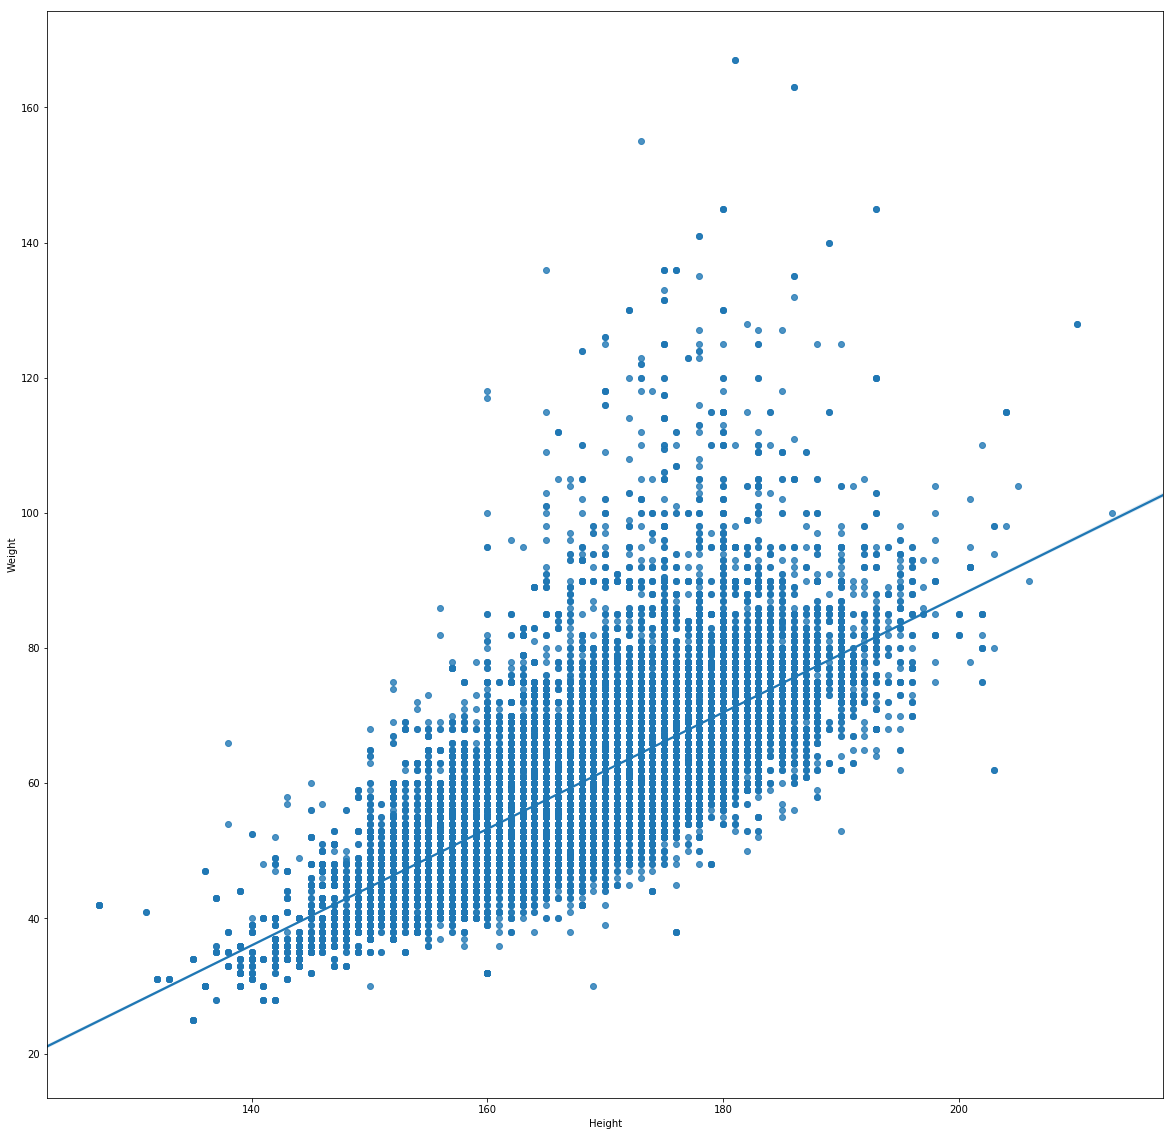

In [55]:
#using scatter plot between height and weight to understand the relation between them.
plt.figure(figsize=(20,20))
plt.tight_layout()
sns.regplot(x=female_data_notnulls['Height'], y=female_data_notnulls['Weight'])
#As the height increases the weight also increase of the athletes

In [56]:
#But there are certain cases where the weight is extremely more but the height is less
#Lets try to analyzing by considering weights > 140
female_data_notnulls.loc[female_data_notnulls.Weight > 140]
#Now this is justifiable because these athletes are from weightlifting events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
124419,62843,Olha Vasylivna Korobka,F,18.0,181.0,167.0,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Ukraine,NaN
124420,62843,Olha Vasylivna Korobka,F,22.0,181.0,167.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver,Ukraine,NaN
147315,73935,Beata Elbieta Maksymowa,F,24.0,180.0,145.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Judo,Judo Women's Heavyweight,NaN,Poland,NaN
147316,73935,Beata Elbieta Maksymowa,F,28.0,180.0,145.0,Poland,POL,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Heavyweight,NaN,Poland,NaN
147317,73935,Beata Elbieta Maksymowa,F,33.0,180.0,145.0,Poland,POL,2000 Summer,2000,Summer,Sydney,Judo,Judo Women's Heavyweight,NaN,Poland,NaN
148349,74435,Holley Mangold,F,22.0,173.0,155.0,United States,USA,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,USA,NaN
196341,98570,Samah Ramadan Mohamed,F,26.0,186.0,163.0,Egypt,EGY,2004 Summer,2004,Summer,Athina,Judo,Judo Women's Heavyweight,NaN,Egypt,NaN
196342,98570,Samah Ramadan Mohamed,F,30.0,186.0,163.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Heavyweight,NaN,Egypt,NaN
202059,101488,Sarah Elizabeth Robles,F,23.0,178.0,141.0,United States,USA,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,USA,NaN
202060,101488,Sarah Elizabeth Robles,F,28.0,178.0,141.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,Bronze,USA,NaN


In [57]:
#Male Specific Data
male_data = merged_data[merged_data['Sex']=='M']
male_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 17 columns):
ID        196594 non-null int64
Name      196594 non-null object
Sex       196594 non-null object
Age       187544 non-null float64
Height    143567 non-null float64
Weight    141470 non-null float64
Team      196594 non-null object
NOC       196594 non-null object
Games     196594 non-null object
Year      196594 non-null int64
Season    196594 non-null object
City      196594 non-null object
Sport     196594 non-null object
Event     196594 non-null object
Medal     28530 non-null object
region    196360 non-null object
notes     4138 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 27.0+ MB


In [61]:
#Filtering male data according to season - Summer
male_data_summer = male_data[male_data['Season']=='Summer']
male_data_summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163109 entries, 0 to 271109
Data columns (total 17 columns):
ID        163109 non-null int64
Name      163109 non-null object
Sex       163109 non-null object
Age       154337 non-null float64
Height    116839 non-null float64
Weight    115260 non-null float64
Team      163109 non-null object
NOC       163109 non-null object
Games     163109 non-null object
Year      163109 non-null int64
Season    163109 non-null object
City      163109 non-null object
Sport     163109 non-null object
Event     163109 non-null object
Medal     24646 non-null object
region    162875 non-null object
notes     3613 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 22.4+ MB


Text(0.5,1,'Medals won by Male athletes across the years during Summer')

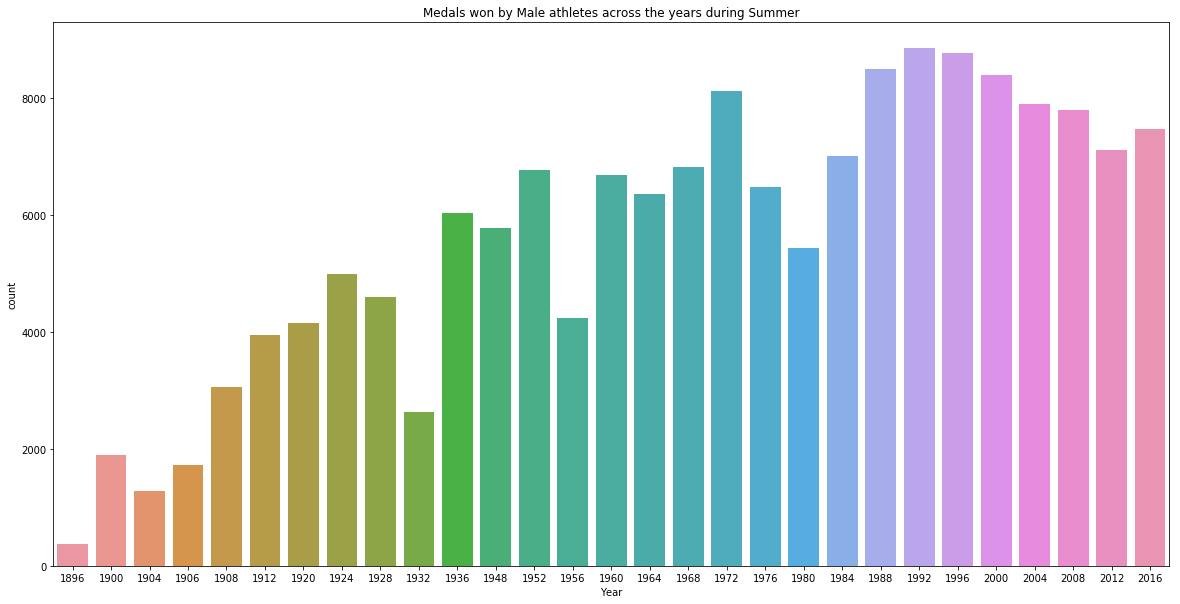

In [63]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x='Year', data=male_data_summer)
plt.title('Medals won by Male athletes across the years during Summer')

In [66]:
#Filtering male data according to Winter season
male_data_winter = male_data[male_data['Season']=='Winter']
male_data_winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33485 entries, 10 to 271115
Data columns (total 17 columns):
ID        33485 non-null int64
Name      33485 non-null object
Sex       33485 non-null object
Age       33207 non-null float64
Height    26728 non-null float64
Weight    26210 non-null float64
Team      33485 non-null object
NOC       33485 non-null object
Games     33485 non-null object
Year      33485 non-null int64
Season    33485 non-null object
City      33485 non-null object
Sport     33485 non-null object
Event     33485 non-null object
Medal     3884 non-null object
region    33485 non-null object
notes     525 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 4.6+ MB


Text(0.5,1,'Medals won by male athletes during the Winter season')

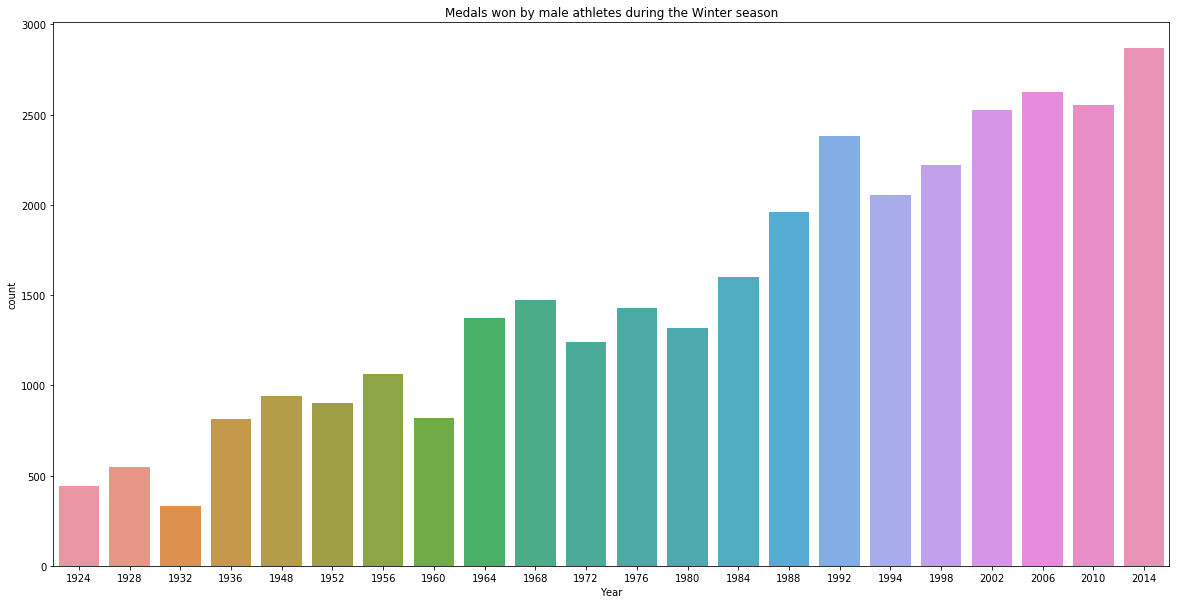

In [68]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(x='Year', data=male_data_winter)
plt.title('Medals won by male athletes during the Winter season')

In [70]:
male_data.info()
#There are missing values in height and weight that need to be removed before doing a scatter plot

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 17 columns):
ID        196594 non-null int64
Name      196594 non-null object
Sex       196594 non-null object
Age       187544 non-null float64
Height    143567 non-null float64
Weight    141470 non-null float64
Team      196594 non-null object
NOC       196594 non-null object
Games     196594 non-null object
Year      196594 non-null int64
Season    196594 non-null object
City      196594 non-null object
Sport     196594 non-null object
Event     196594 non-null object
Medal     28530 non-null object
region    196360 non-null object
notes     4138 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 32.0+ MB


In [74]:
male_data_notnulls = male_data.loc[(male_data['Weight'].notnull()) & (male_data['Height'].notnull())]
male_data_notnulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140124 entries, 0 to 271115
Data columns (total 17 columns):
ID        140124 non-null int64
Name      140124 non-null object
Sex       140124 non-null object
Age       139454 non-null float64
Height    140124 non-null float64
Weight    140124 non-null float64
Team      140124 non-null object
NOC       140124 non-null object
Games     140124 non-null object
Year      140124 non-null int64
Season    140124 non-null object
City      140124 non-null object
Sport     140124 non-null object
Event     140124 non-null object
Medal     19846 non-null object
region    139973 non-null object
notes     2770 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 19.2+ MB


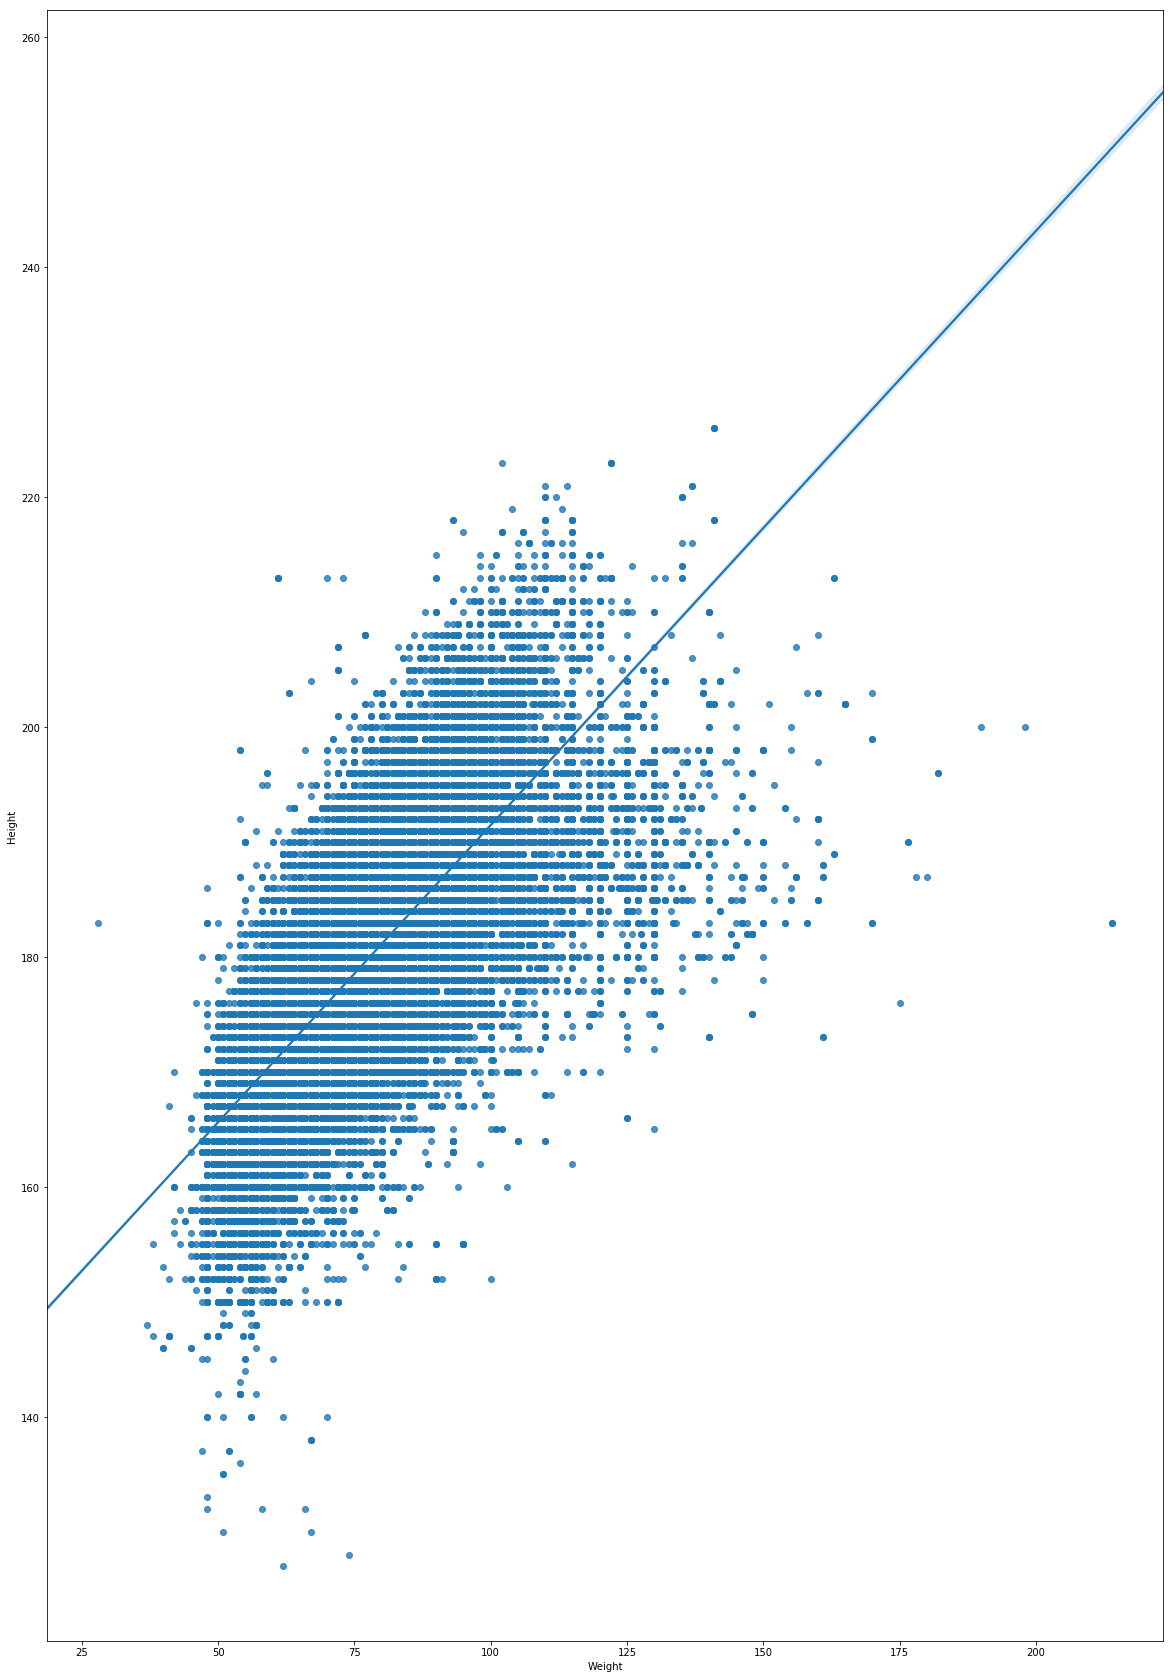

In [81]:
plt.figure(figsize=(20,30))
sns.regplot(x=male_data_notnulls['Weight'], y=male_data_notnulls['Height'])

In [84]:
#Medal Count as per Country for Male athletes during various seasons
male_data_winter.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2495
1,Germany,2309
2,Russia,1797
3,Canada,1796
4,Italy,1751


Text(0.5,1,'Medals per country during Winter')

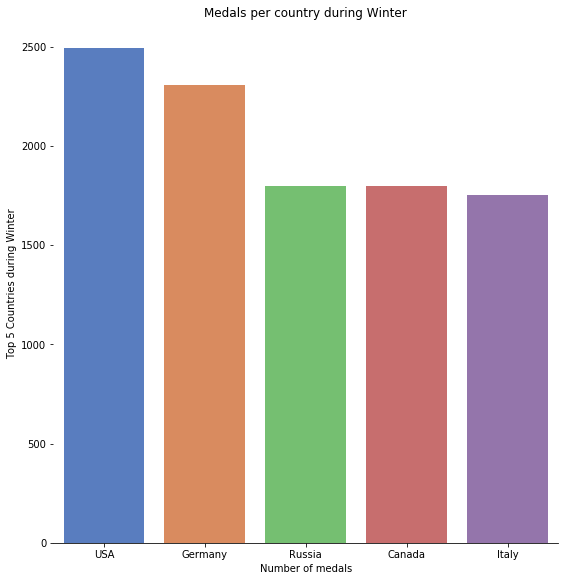

In [88]:
male_winter_totalmedals = male_data_winter.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x='index', y='Medal', data=male_winter_totalmedals, height=8, kind='bar', palette='muted')
g.despine(left=True)
g.set_ylabels('Top 5 Countries during Winter')
g.set_xlabels('Number of medals')
plt.title('Medals per country during Winter')

In [92]:
#Medal count per country for Male athletes during the Summer season
male_data_summer.region.value_counts().reset_index(name='Medals').head(5)

,index,Medals
0,USA,10825
1,Germany,8725
2,France,8477
3,UK,7995
4,Italy,6421


Text(0.5,1,'Medals per country during Summer')

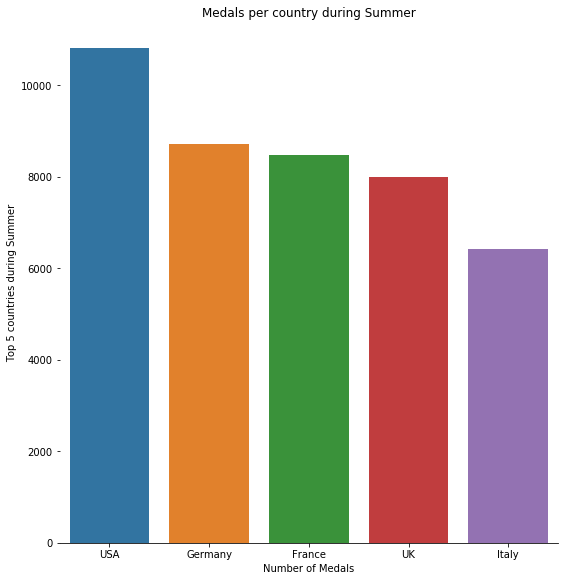

In [100]:
male_summer_totalmedals = male_data_summer.region.value_counts().reset_index(name='Medals').head(5)
g = sns.catplot(x='index', y='Medals', data=male_summer_totalmedals, height=8, kind='bar')
g.despine(left=True)
g.set_xlabels('Number of Medals')
g.set_ylabels('Top 5 countries during Summer')
plt.title('Medals per country during Summer')

In [106]:
#Medals per countrya
merged_data.region.value_counts().reset_index(name='Medals').head(5)

,index,Medals
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692


Text(0.5,1,'Top 5 overall countries with highest medals to date')

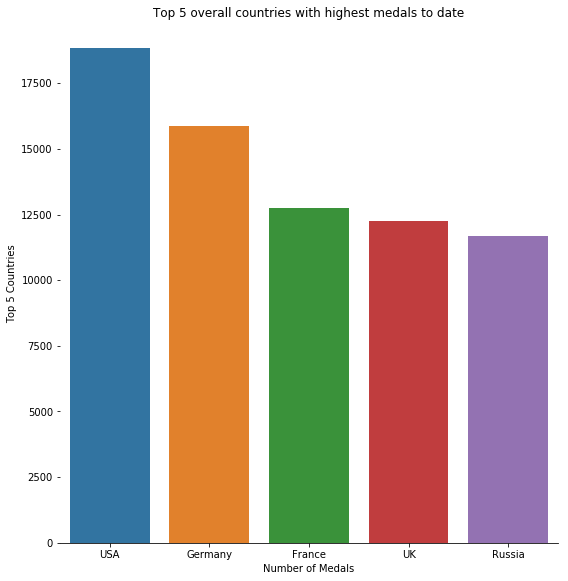

In [112]:
merged_data_total = merged_data.region.value_counts().reset_index(name='Medals').head(5)
g = sns.catplot(x='index', y='Medals', data=merged_data_total, height=8, kind='bar')
g.despine(left=True)
g.set_xlabels('Number of Medals')
g.set_ylabels('Top 5 Countries')
plt.title('Top 5 overall countries with highest medals to date')

In [120]:
#USA has won the most number of medals so to analyze which sports/disciplines in US have the most medals
usa_only = merged_data[merged_data['NOC']=='USA']
usa_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 10 to 271107
Data columns (total 17 columns):
ID        18853 non-null int64
Name      18853 non-null object
Sex       18853 non-null object
Age       18555 non-null float64
Height    14828 non-null float64
Weight    14293 non-null float64
Team      18853 non-null object
NOC       18853 non-null object
Games     18853 non-null object
Year      18853 non-null int64
Season    18853 non-null object
City      18853 non-null object
Sport     18853 non-null object
Event     18853 non-null object
Medal     5637 non-null object
region    18853 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.6+ MB


In [123]:
usa_only.Event.value_counts().reset_index(name='Medals').head(20)

,index,Medals
0,Ice Hockey Men's Ice Hockey,397
1,"Art Competitions Mixed Painting, Unknown Event",309
2,Water Polo Men's Water Polo,254
3,Gymnastics Men's Individual All-Around,237
4,Basketball Men's Basketball,222
5,Rowing Men's Coxed Eights,217
6,Gymnastics Men's Team All-Around,208
7,Football Men's Football,205
8,Bobsleigh Men's Four,156
9,Swimming Men's 4 x 200 metres Freestyle Relay,147


In [131]:
#Now lets see in which discipline has usa attained the most number of gold medals
usa_gold = usa_only[usa_only['Medal']=='Gold']
usa_gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 283 to 270394
Data columns (total 17 columns):
ID        2638 non-null int64
Name      2638 non-null object
Sex       2638 non-null object
Age       2627 non-null float64
Height    2242 non-null float64
Weight    2127 non-null float64
Team      2638 non-null object
NOC       2638 non-null object
Games     2638 non-null object
Year      2638 non-null int64
Season    2638 non-null object
City      2638 non-null object
Sport     2638 non-null object
Event     2638 non-null object
Medal     2638 non-null object
region    2638 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 371.0+ KB


In [133]:
usa_gold.Event.value_counts().reset_index(name='Medal').head(20)
#Basketball seems to be wear they have scored the most medals
#But these medals are counted on athlete level not on the team level so they need to be grouped on a team level to see the actual number of medals

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


In [142]:
#Taking the basketball data and finding the actual number medals won by USA in basketball
usa_basketball = usa_gold.loc[(usa_gold['Sport']=='Basketball') & (usa_gold['Sex']=='M')].sort_values('Year')

In [143]:
usa_basketball.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [150]:
#Groups the data according to the year and gets the first occurance per year
grouped_basketball = usa_basketball.groupby(['Year']).first()

In [154]:
grouped_basketball['ID'].count()
#The actual medals earned in the basketball sport have been 15 but as each team player gets a medal, so the number of medals projected is so high

15

In [159]:
#To understand how the athletes have varied across time - SUMMER GAMES
summer_male = merged_data.loc[(merged_data['Sex']=='M') & (merged_data['Season']=='Summer')]
summer_female = merged_data.loc[(merged_data['Sex']=='F') & (merged_data['Season']=='Summer')]

In [160]:
summer_male.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


In [161]:
summer_female.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5,1,'Variation of Male athletes during Summer Games')

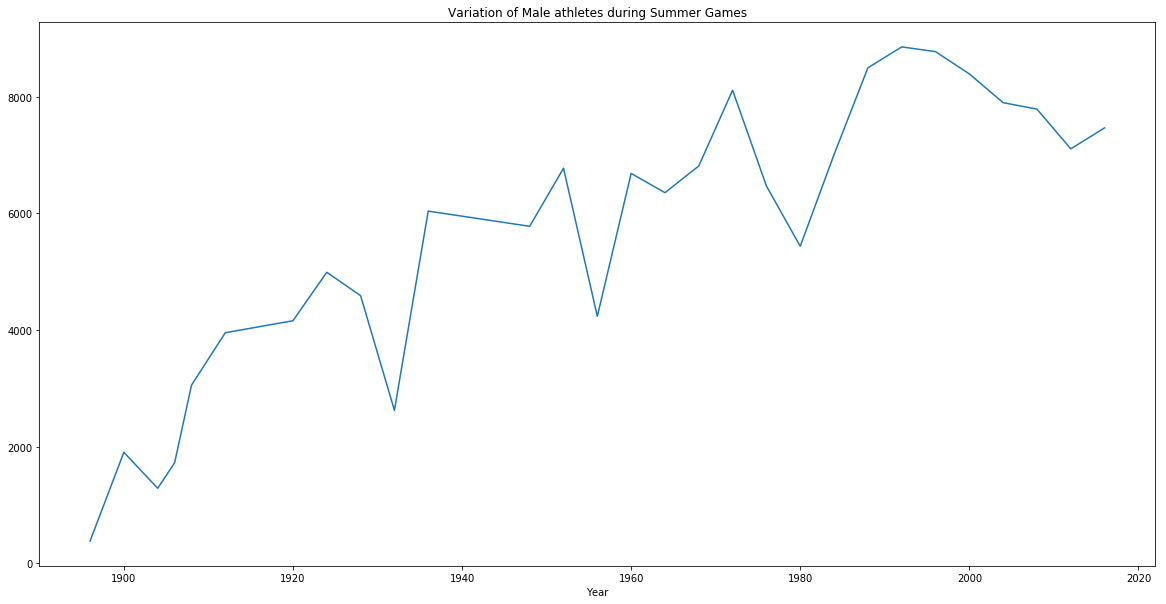

In [171]:
summer_male_trend = summer_male.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
summer_male_trend[:,'M'].plot()
plt.title('Variation of Male athletes during Summer Games')

Text(0.5,1,'Variation of Female athletes during the Summer season')

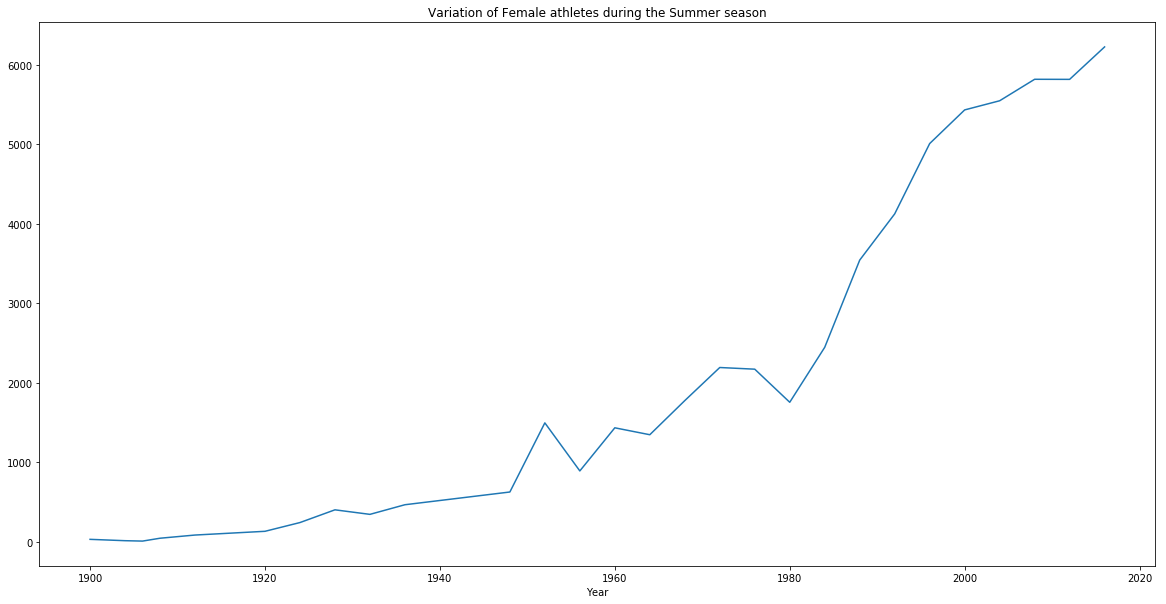

In [178]:
summer_female_trend = summer_female.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
summer_female_trend[:,'F'].plot()
plt.title('Variation of Female athletes during the Summer season')

In [180]:
#From the above to graphs the following things can be noticed
#Male athletes in summer games have be decreasing from 1990
#Female athletes in summer games have a steep increase especially after 1980

In [ ]:
#To understand how the athletes have varied across time - SUMMER GAMES
winter_male = merged_data[(merged_data['Sex']=='M') & (merged_data['Season']=='Winter')]
winter_female = merged_data[(merged_data['Sex']=='F') & (merged_data['Season']=='Winter')]

Text(0.5,1,'Variation of male atheletes during the Winter games')

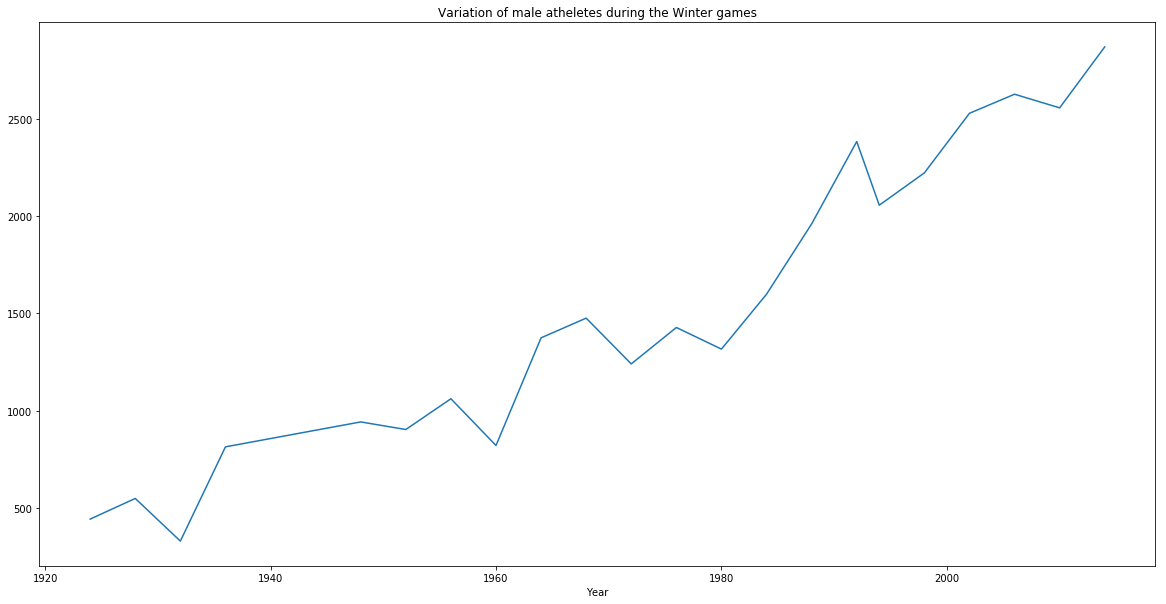

In [182]:
winter_male_trend = winter_male.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
winter_male_trend[:,'M'].plot()
plt.title('Variation of male atheletes during the Winter games')

Text(0.5,1,'Variation of Female atheletes during the Winter games')

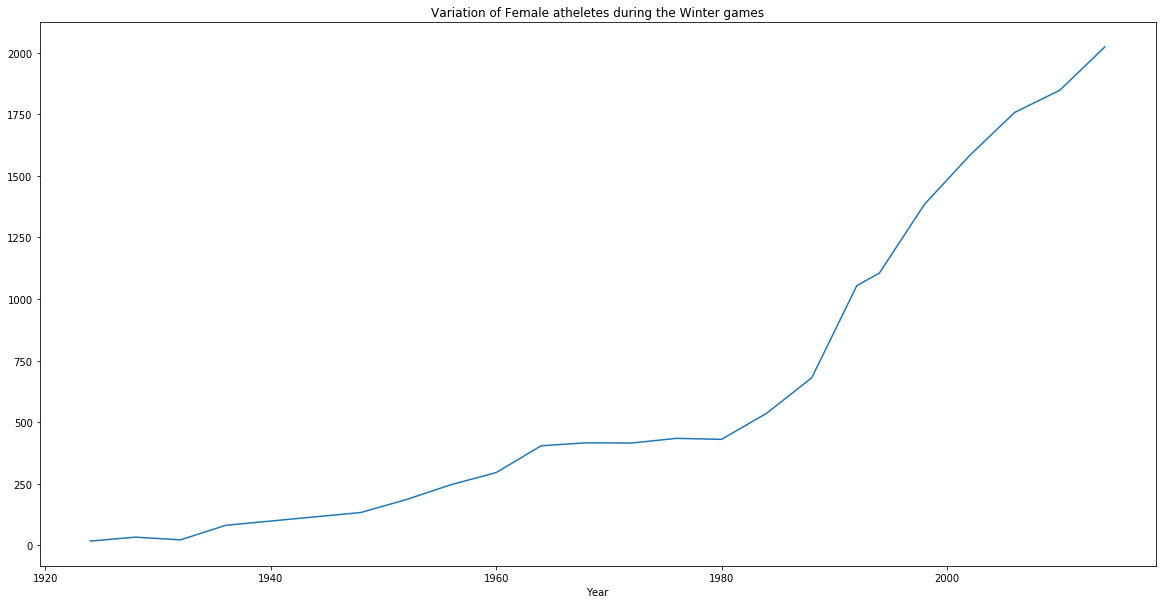

In [185]:
winter_female_trend = winter_female.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
winter_female_trend[:,'F'].plot()
plt.title('Variation of Female atheletes during the Winter games')

In [186]:
#From the above to graphs the following things can be noticed
#Male athletes in winter games have be on a constant rise
#Female athletes in winter games have been increasing and had a steep rise following 1990

Text(0.5,1,'Variation of Age for Male Athletes over Summer season')

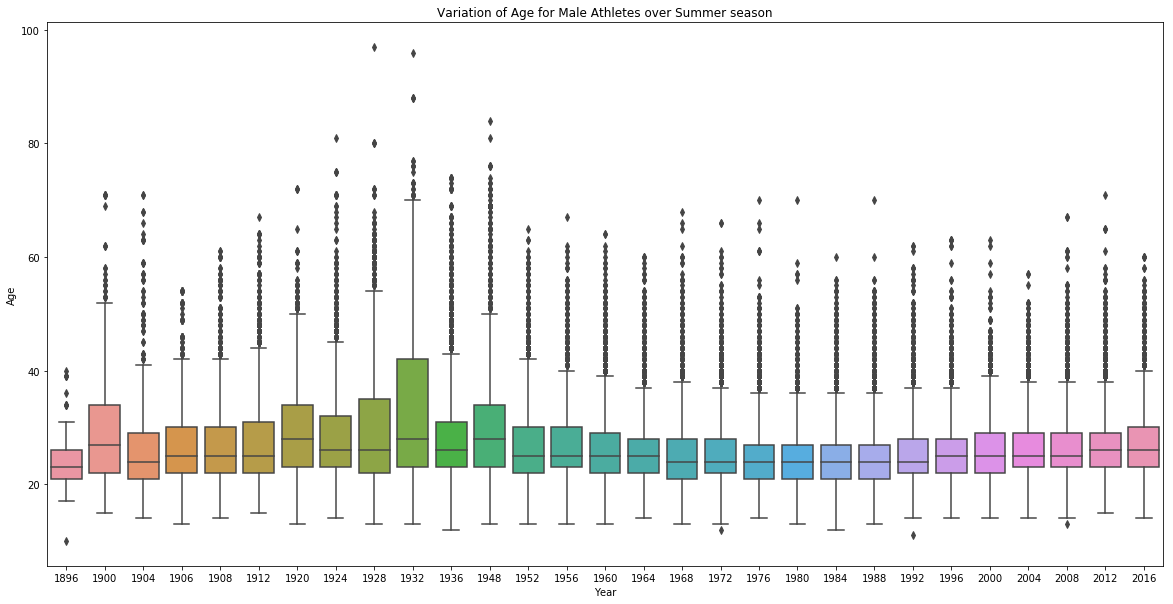

In [191]:
plt.figure(figsize=(20,10))
sns.boxplot('Year','Age', data=summer_male)
plt.title('Variation of Age for Male Athletes over Summer season')

In [194]:
#There are people between 1932 and 1948 who are aged above 80, getting more details on it.
summer_male[summer_male['Age']>80]

#We see that during this period Olympics had art competitions and these people are from that category

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


Text(0.5,1,'Variation of Age for Female Athletes over Summer season')

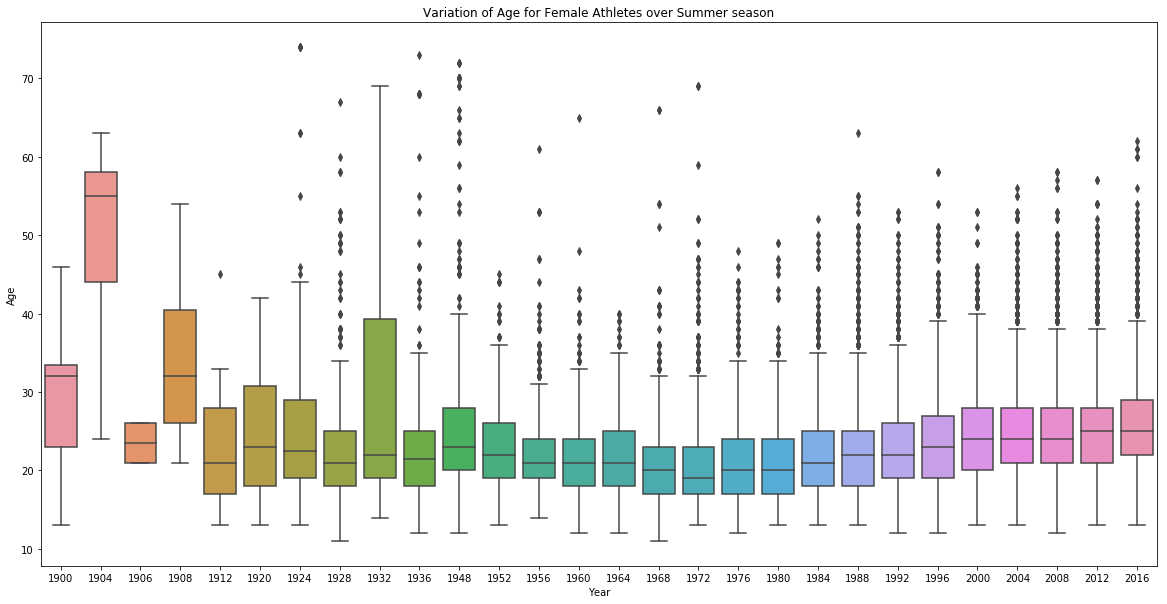

In [196]:
plt.figure(figsize=(20,10))
sns.boxplot('Year','Age', data=summer_female)
plt.title('Variation of Age for Female Athletes over Summer season')

In [198]:
#The women in 1904 are of totally different age groups, looking more into this
summer_female[summer_female['Year']==1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


Text(0.5,1,'Variation of age for Male athletes during the Winter season')

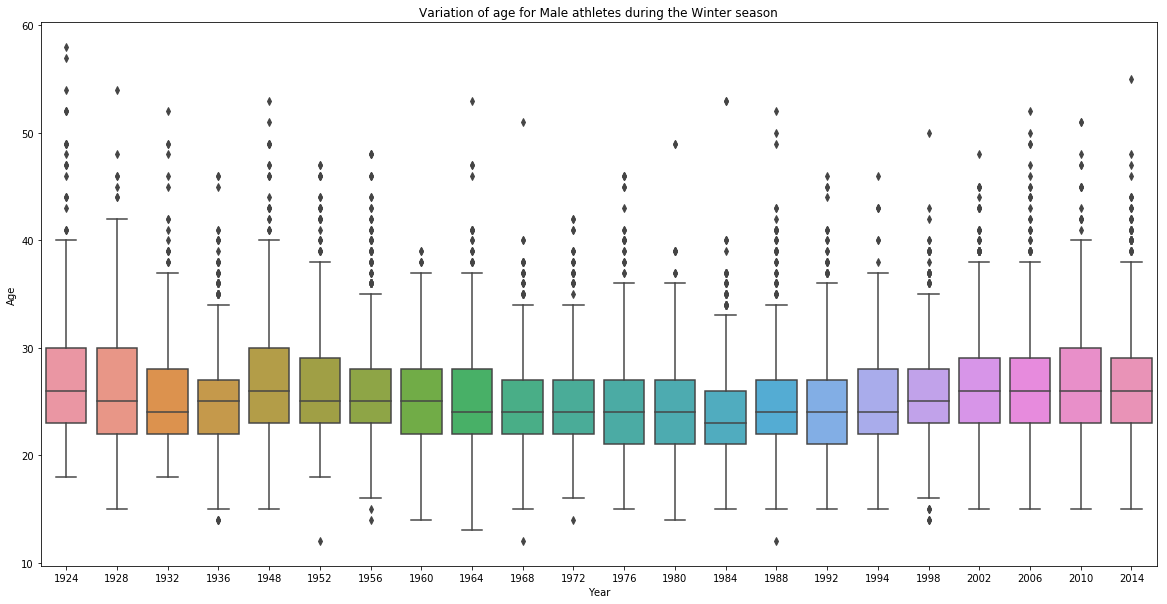

In [199]:
plt.figure(figsize=(20,10))
sns.boxplot('Year','Age', data=winter_male)
plt.title('Variation of age for Male athletes during the Winter season')

Text(0.5,1,'Variation of age of Female athletes across Winter games')

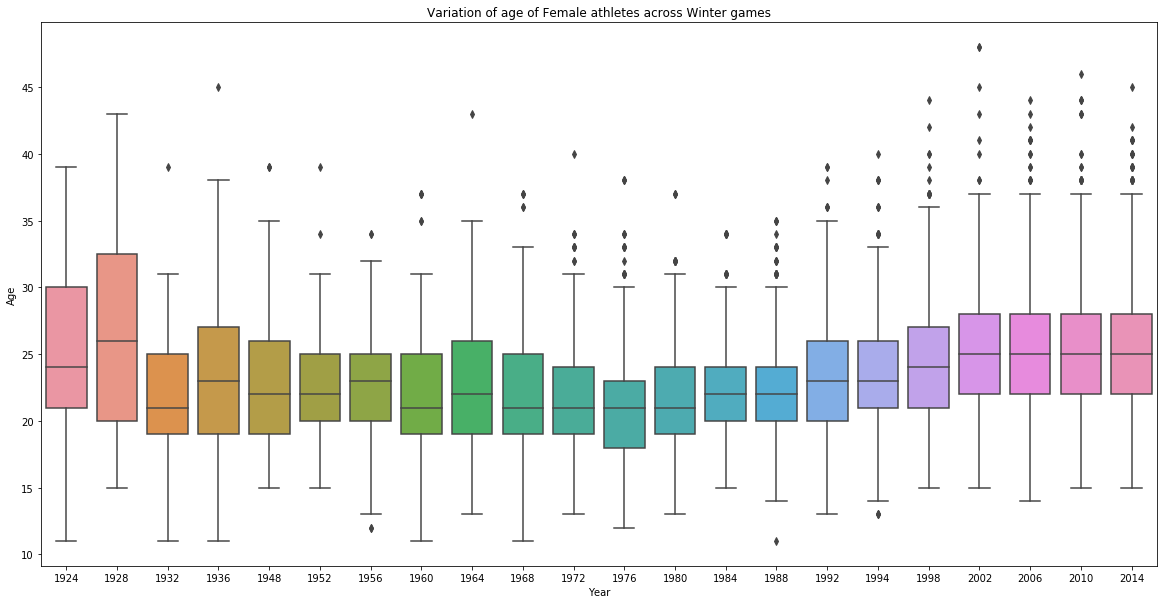

In [200]:
plt.figure(figsize=(20,10))
sns.boxplot('Year','Age',data=winter_female)
plt.title('Variation of age of Female athletes across Winter games')

Text(0.5,1,'Variation of weight of male athletes during the Summer season')

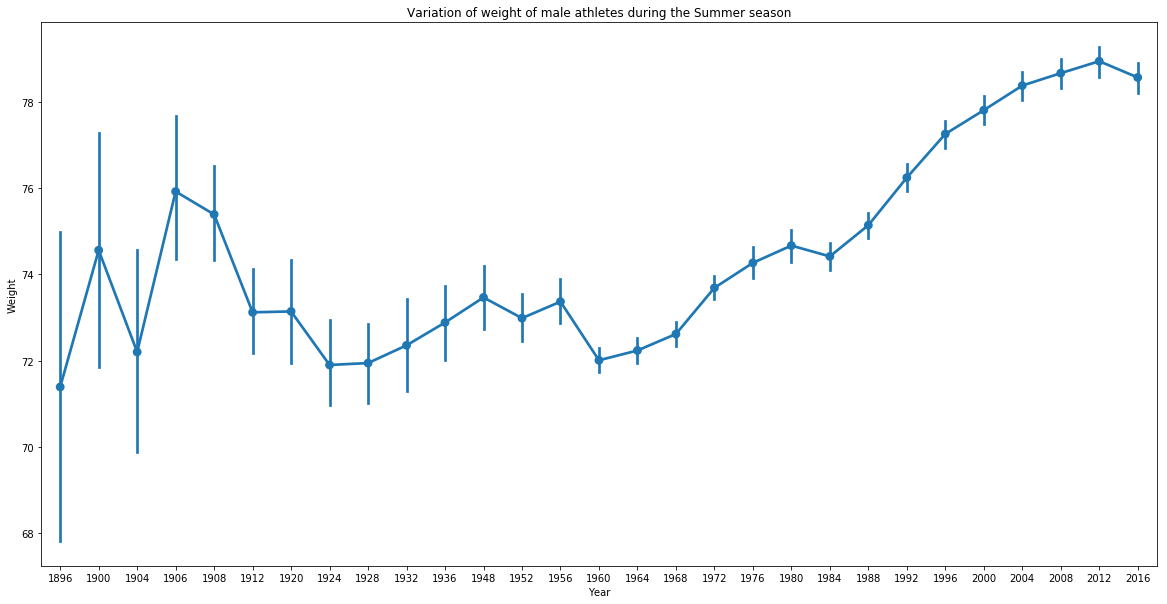

In [202]:
#Lets try to see the variation of weight over time
plt.figure(figsize=(20,10))
sns.pointplot('Year', 'Weight', data=summer_male)
plt.title('Variation of weight of male athletes during the Summer season')

Text(0.5,1,'Variation of weight of female athletes during the Summer season')

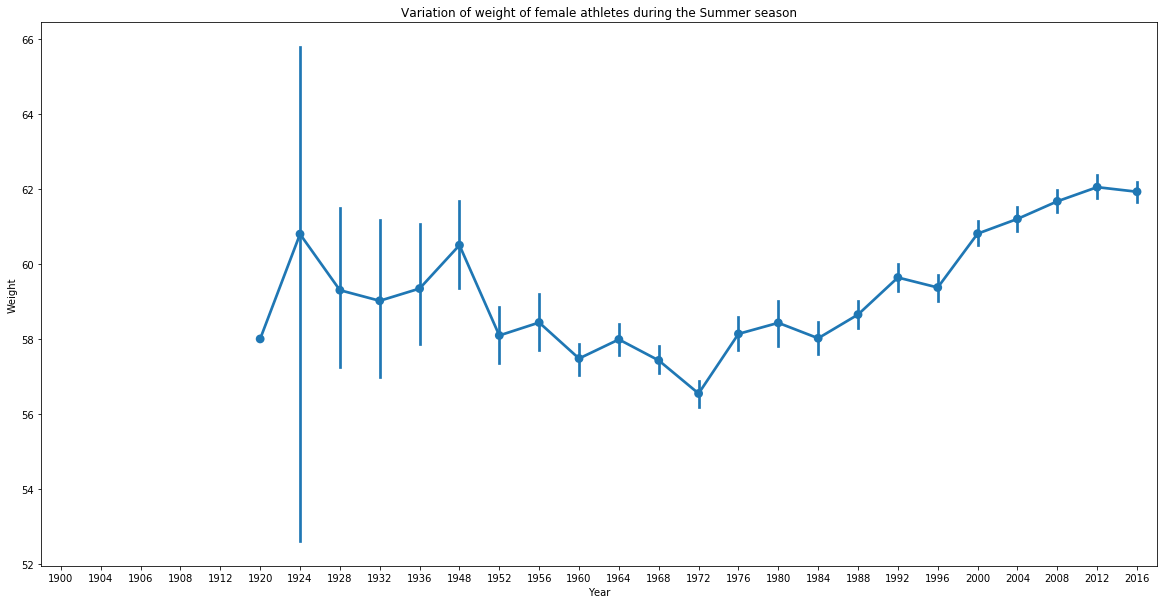

In [203]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Weight',data=summer_female)
plt.title('Variation of weight of female athletes during the Summer season')

In [205]:
#To find why data is not ploted for year before 1924
summer_female[summer_female['Year']<1924]

#We see that the values are NaN for the weight columns for years before 1924 and this is why we do not see any values

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN


Text(0.5,1,'Variation of weight for male athletes across Winter season')

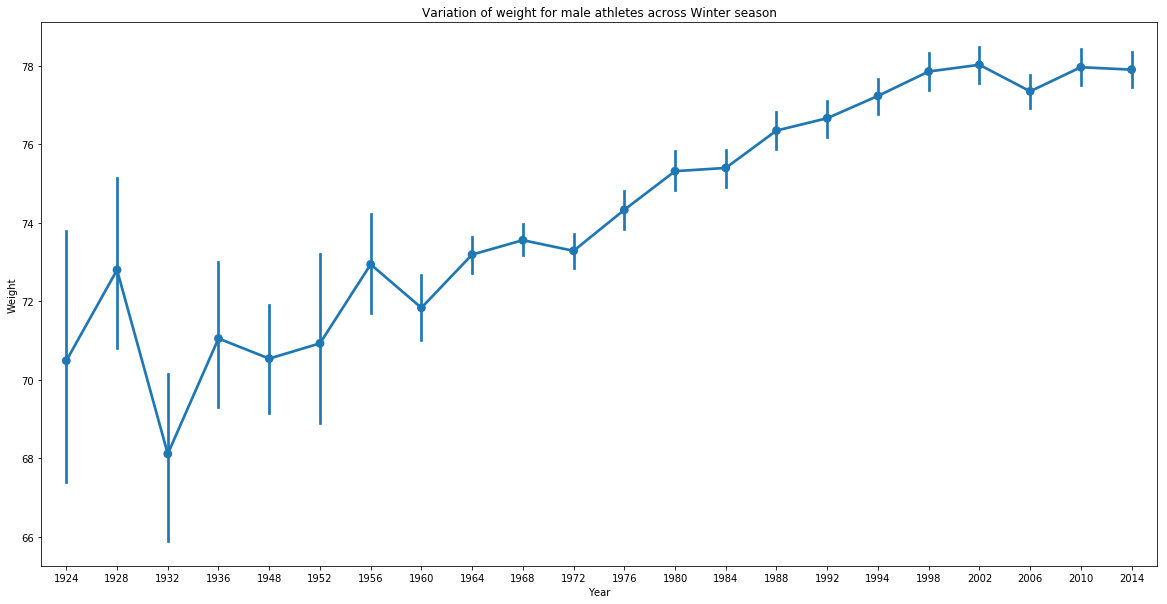

In [206]:
#WINTER GAMES WEIGHT VARIATION
plt.figure(figsize=(20,10))
sns.pointplot('Year','Weight',data=winter_male)
plt.title('Variation of weight for male athletes across Winter season')

Text(0.5,1,'Variation of weight for female athletes across Winter season')

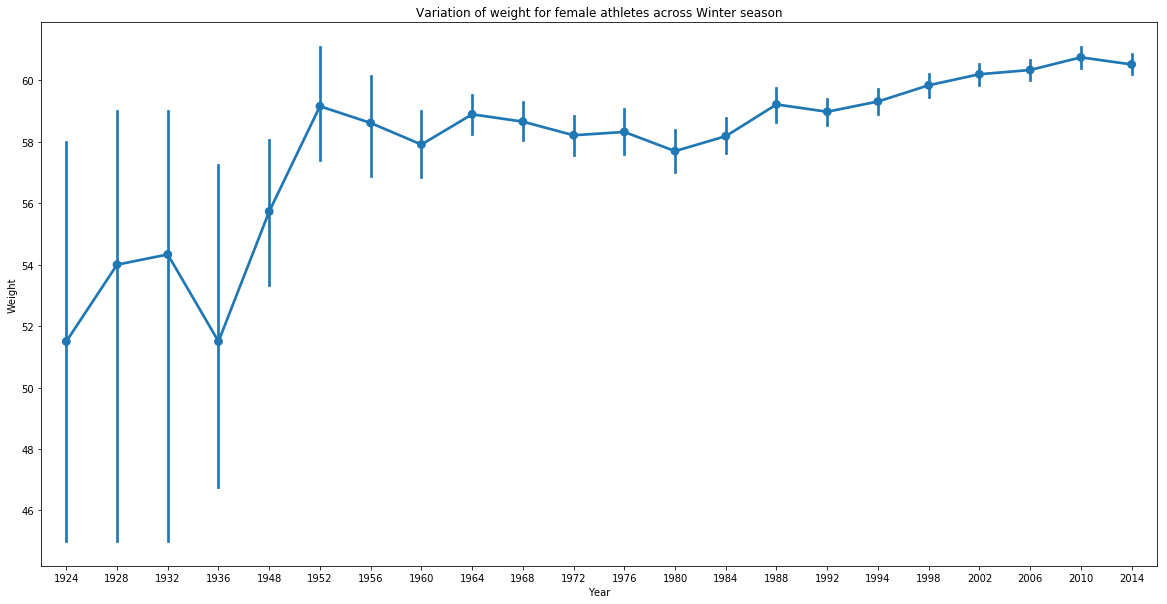

In [207]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Weight',data=winter_female)
plt.title('Variation of weight for female athletes across Winter season')

Text(0.5,1,'Variation of height for male athletes across Summer season')

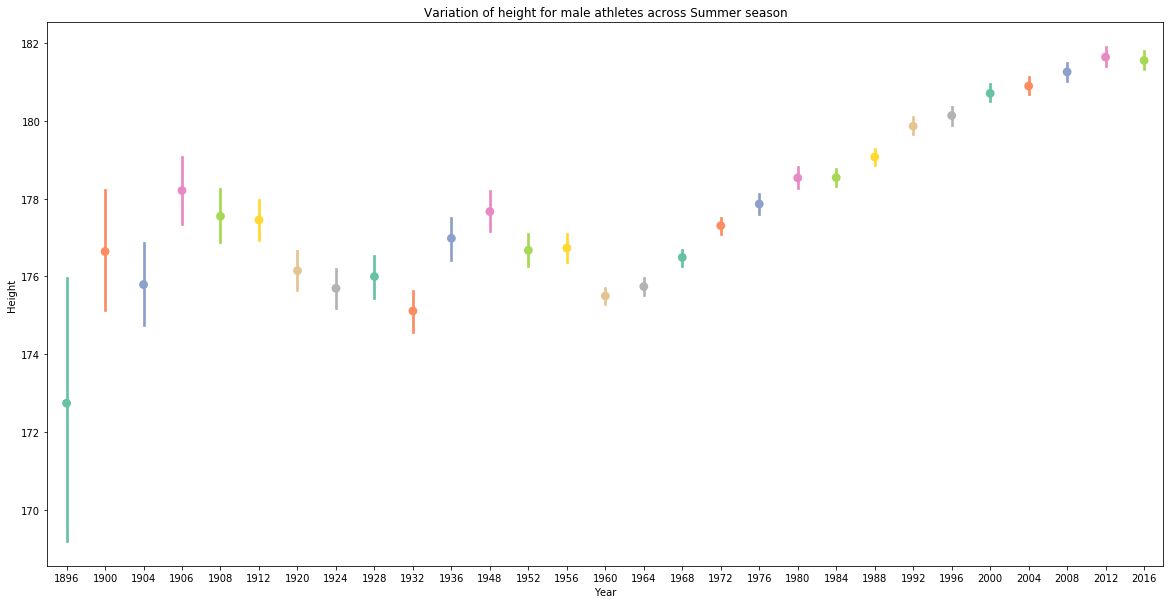

In [212]:
#Lets try to plot the height variation across time
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height', data=summer_male, palette='Set2')
plt.title('Variation of height for male athletes across Summer season')

Text(0.5,1,'Variation of height for female athletes across Summer season')

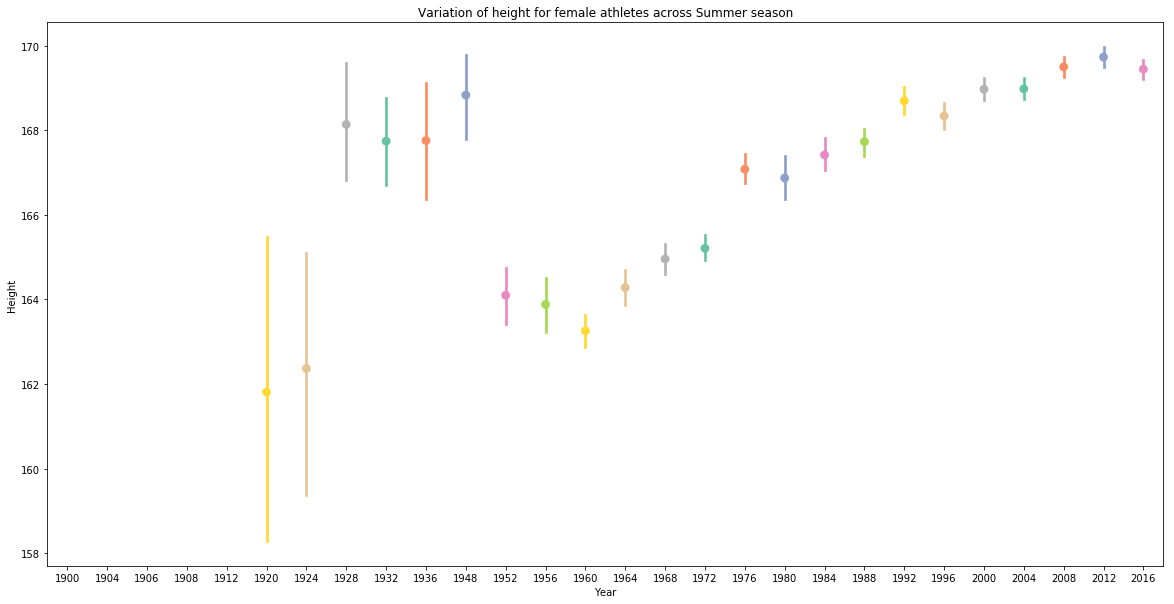

In [213]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height', data=summer_female, palette='Set2')
plt.title('Variation of height for female athletes across Summer season')

In [215]:
summer_female[(summer_female['Year']>1928) & (summer_female['Year']<1952)]
#The values of female atheletes between 1928 and 1952 is very high as there are a lot of NaNs

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
731,419,Majken berg,F,30.0,170.0,60.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,Sweden,NaN
1301,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Freestyle,NaN,Hungary,NaN
1302,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Hungary,NaN
1484,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,NaN,Canada,NaN
1485,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Platform,NaN,Canada,NaN
1569,875,Jenny Marie Beatrice Addams,F,23.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
1570,875,Jenny Marie Beatrice Addams,F,27.0,NaN,NaN,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
1571,875,Jenny Marie Beatrice Addams,F,39.0,NaN,NaN,Belgium,BEL,1948 Summer,1948,Summer,London,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN


In [ ]:
#During Summer games we see there is a dip in heights of both male and female after year 2012

Text(0.5,1,'Variation of height for male athletes across Winter season')

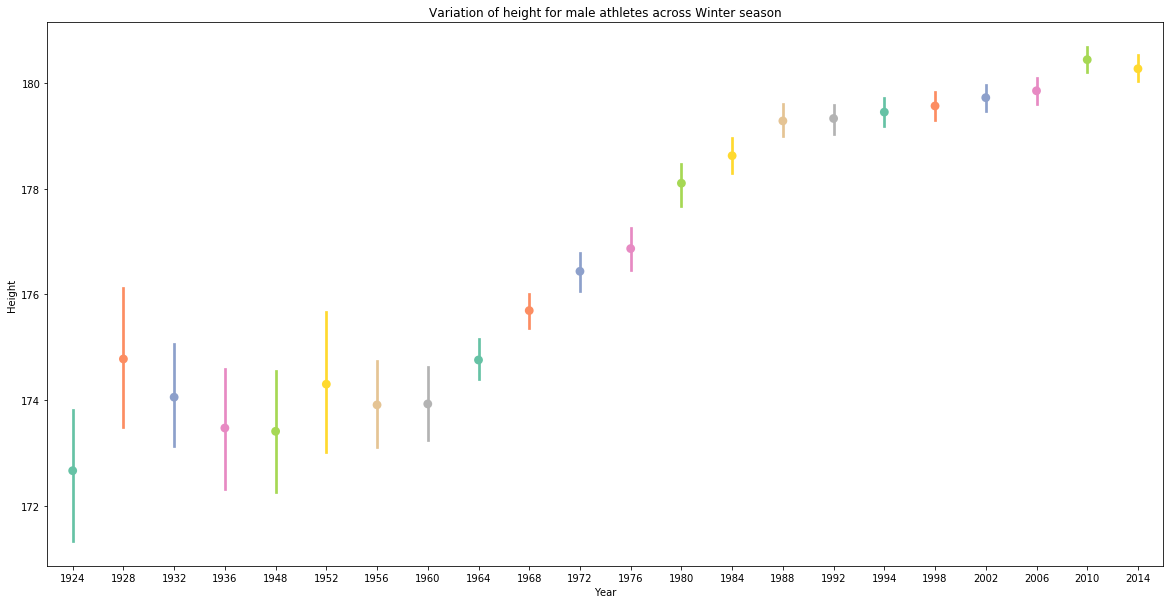

In [217]:
#WINTER GAMES - HEIGHT VARIATION
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height', data=winter_male, palette='Set2')
plt.title('Variation of height for male athletes across Winter season')

Text(0.5,1,'Variation of height for female athletes across Winter season')

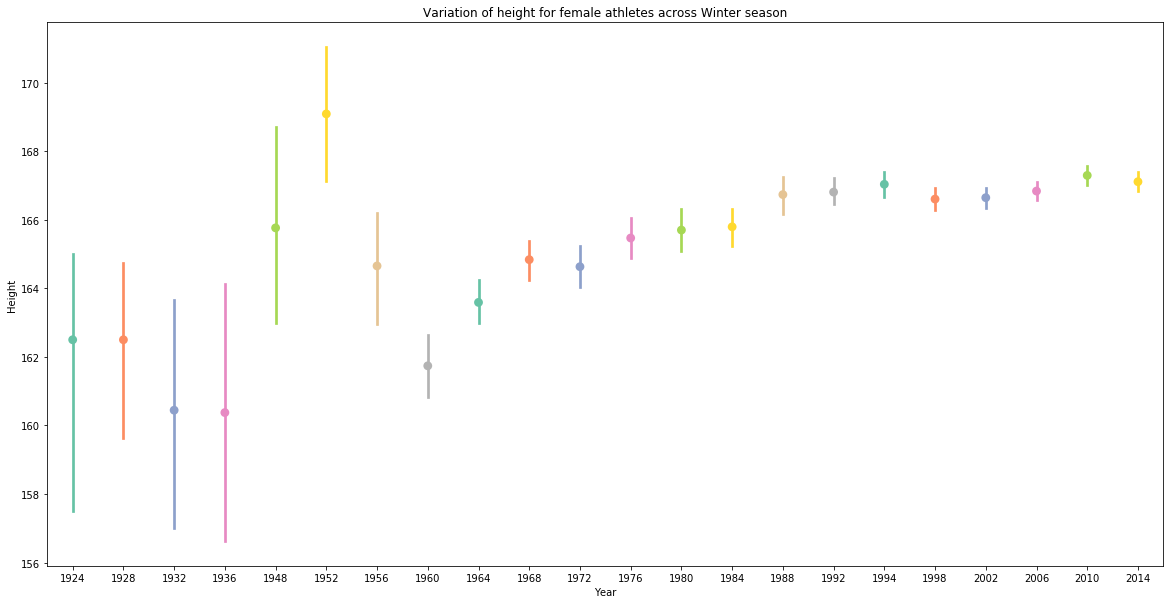

In [218]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height', data=winter_female, palette='Set2')
plt.title('Variation of height for female athletes across Winter season')

In [220]:
winter_female[winter_female['Year']==1952]
#There is a spike in 1952 variation due to a lot of NaNs
#There is slight dip in Height variation of both male and female athletes after 2012

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
743,426,Edme Abetel (-Barr),F,29.0,NaN,NaN,Switzerland,SUI,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Slalom,NaN,Switzerland,NaN
2103,1172,Marysette Agnel,F,25.0,NaN,NaN,France,FRA,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Downhill,NaN,France,NaN
2104,1172,Marysette Agnel,F,25.0,NaN,NaN,France,FRA,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN,France,NaN
2105,1172,Marysette Agnel,F,25.0,NaN,NaN,France,FRA,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Slalom,NaN,France,NaN
2431,1358,Kerstin Lucia Ahlqvist (-Winnberg),F,24.0,NaN,NaN,Sweden,SWE,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN,Sweden,NaN
2432,1358,Kerstin Lucia Ahlqvist (-Winnberg),F,24.0,NaN,NaN,Sweden,SWE,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Slalom,NaN,Sweden,NaN
4152,2382,Margit Albrechtsson (sberg-),F,34.0,NaN,NaN,Sweden,SWE,1952 Winter,1952,Winter,Oslo,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Sweden,NaN
4156,2386,"Tenley Emma Albright (-Gardiner, -Blakely)",F,16.0,NaN,NaN,United States,USA,1952 Winter,1952,Winter,Oslo,Figure Skating,Figure Skating Women's Singles,Silver,USA,NaN
5173,2938,Eivor Matilda Alm (-Astergren),F,27.0,NaN,NaN,Sweden,SWE,1952 Winter,1952,Winter,Oslo,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Sweden,NaN
5515,3118,Jeannette Eleanor Altwegg (-Wirz),F,21.0,NaN,NaN,Great Britain,GBR,1952 Winter,1952,Winter,Oslo,Figure Skating,Figure Skating Women's Singles,Gold,UK,NaN
